<img src="https://cdn.dal.ca/about-dal/history-tradition/logo-seal/_jcr_content/contentPar/staticimage.adaptive.full.high.png/1654529048363.png" alt="Dalogo" width="200"/>

# CSCI 4144 -  Data Mining and Data Warehousing
# Assignment 1 - Basic Techniques

**Due:** 3 February, 19h AT

**Your name:** \[James McKinlay\]  
**Your Banner ID:** \[B00867096\]  
**Your NetID:** \[jm651986\]

### Assessment

***!This cell is completed only by your marker!***


| #  | Section       |Mark | Out of  |  Comments |
|----|---------------|-----|---------|-----------|
| 1  | Section 1     |     | /25     |           |
| 2  | Section 2     |     | /22     |           |
| 3  | Bonus         |     | /5      |           |
| -  | TOTAL         |     | /47     |           |

The main purpose of this assignment is to get familiar with processes of constructing and using a data warehouse. There are two sections: the first focuses on simple data loading and cleaning with simple data, and the second focuses on more complex data. In both cases, we will use publicly available datasets focused in the healthcare domain.

In [4]:
import sys
!{sys.executable} -m pip install fitter

  Using cached fitter-1.5.2.tar.gz (27 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fitter: filename=fitter-1.5.2-py3-none-any.whl size=25608 sha256=749fc18e74779aad68a3b17312cabecf19ee6459dd8f29ad9a2029de40463fb9
  Stored in directory: c:\users\jmcki\appdata\local\pip\cache\wheels\2f\4b\12\1c9085f8ecb92805ca8645ab9c61703a2874685a9fb87b0bdb
Successfully built fitter


In [94]:
# import any libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from fitter import Fitter, get_common_distributions

# TODO: add any additional libraries here

# your code should run in Python3.9

## Section 1 - Data cleaning and ETL

A [Notifiable disease](https://en.wikipedia.org/wiki/Notifiable_disease#Canada) is any disease that, by law, must be reported to government authorities. Aggregating data on these diseases allows the authorities to monitor their development, and provides early warning of possible outbreaks. The [Canadian Notifiable Disease Surveillance System](https://diseases.canada.ca/notifiable/) is a searchable database tool provided by the Public Health Agency of Canada. 

In this Section, we will practice cleaning some small, simple datasets.

### Dataset

The data for this section come from [Nova Scotia's Open Data Portal](https://data.novascotia.ca/) under the [Nova Scotia Open Government Licence](http://novascotia.ca/opendata/licence.asp). Specifically:

1. [Notifiable Diseases Counts and Rates By Zone 2014-2017](https://data.novascotia.ca/Health-and-Wellness/Notifiable-Diseases-Counts-and-Rates-By-Zone-2014-/36ek-n7n8), and
2. [Notifiable Diseases Counts and Rates By Sex 2014-2017](https://data.novascotia.ca/Health-and-Wellness/Notifiable-Diseases-Counts-and-Rates-By-Sex-2014-2/hgpa-vixp)

The two files are in the [CSV](https://www.w3schools.com/python/pandas/pandas_csv.asp) file format, with a single header row and the following fields (Zone and Sex only appear in their respective file):

| Field                       | Type      | Description |
|-----------------------------|-----------|-------------|
| Zone                        | Text      | One of four non-overlapping regions, or the aggregate 'Nova Scotia'      |
| Sex                         | Text      | Traditional binary labels, or the aggregate 'All'       |
| Year                        | Int       | The year in the Common Era |
| Disease                     | Text      | The name of the disease. Additional information on the diseases can be found [here](https://novascotia.ca/dhw/cdpc/cdc/). |
| Number of Cases             | Int       | The number of cases in the indicated region, for the indicated year |
| Rate per 100,000 population | Float     | The rate per 100,000 population in the indicated region, for the indicated year |


Public government data are less likely to contain errors that require cleaning or correction, so we have artificially corrupted the data for this assignment using a Python script. Specifically, we have made the following corruptions:

1. **Removal**. We have randomly removed data in individual cells. Fields may be empty, have some indicative label such as 'Null', or some other corruption indicating deletion. To mimic real-world scenarios, we cannot tell you what all of these corruptions may be.
2. **Range errors**. We have given some numeric data impossibly small values.
3. **Spelling**. We have introduced spelling mistakes using the [corrupted-text](https://pypi.org/project/corrupted-text/) library to text fields.
4. **Duplicates**. We have randomly repeated some rows
5. **Shuffle**. We have randomly shuffled rows subsequent to the above corruptions.

### Tasks

Our tasks in this section are to clean the data, perform simple 'sanity checks', and display some simple visualizations. This is essentially a simplified view into an ETL process. You can use the clean data provided directly by the Nova Scotia government at the links above to validate your work, but your code must work assuming you don't have acss to the clean gold standard versions. Also note that we are fortunate that these data have, essentially, error-correcting codes built in, since 'All' data should be the sum of Male and Female data, and 'Nova Scotia' data should be the sum of all the individual regions.

Complete each of the code cells below according to the instructions in the comments.



In [117]:
# 1. load the corrupted data in a Pandas DataFrame. 
#     Note that we will test your code on another corruption of the same dataset, 
#        so you should not hardcode to your version. 
#     Note that you can load your own corruptions for testing, 
#        but you should submit a notebook with our original corruptions.

# Note: you are encouraged to download these files either from here or from Brightspace directly and to use them locally,
#       as long as your code works for the markers (e.g., do not hardcode local paths in submission).
urlSex  = 'https://dal.brightspace.com/d2l/common/viewFile.d2lfile/Database/MTQ0Nzc0MDc/Notifiable_Diseases_Counts_and_Rates_By_Sex_2014-2017.corrupt.csv?ou=250788'
urlZone = 'https://dal.brightspace.com/d2l/common/viewFile.d2lfile/Database/MTQ0Nzc0MDg/Notifiable_Diseases_Counts_and_Rates_By_Zone_2014-2017.corrupt.csv?ou=250788'

# TODO YOUR CODE GOES HERE

#When I use urlSex and urlZone I get a 404 forbidden error. Path is to the same folder the assignment is in.
dfSex = pd.read_csv(r'C:\Users\jmcki\CSCI 4144 Jupyter\Notifiable_Diseases_Counts_and_Rates_By_Sex_2014-2017.corrupt.csv')
dfZone = pd.read_csv(r'C:\Users\jmcki\CSCI 4144 Jupyter\Notifiable_Diseases_Counts_and_Rates_By_Zone_2014-2017.corrupt.csv')
dfSex = pd.DataFrame(dfSex)
dfZone = pd.DataFrame(dfZone)

HTTPError: HTTP Error 403: Forbidden

In [96]:
# 2. sort both DataFrames by Year, then by Disease, then by either Zone or Sex. 
#    I.e., all data for 2014 comes before all data from 2015; 
#          within 2014, all data for 'Acquired Immune Deficiency Syndrome' comes before all data for 'Hepatitis B - Acute', 
#          and so on 

# TODO YOUR CODE GOES HERE
dfSexSorted = dfSex.sort_values(['Year', 'Disease', 'Sex'])
dfZoneSorted = dfZone.sort_values(['Year', 'Disease', 'Zone'])
# TODO: print the two sorted Pandas DataFrames
print(dfSexSorted.to_string())
print(dfZoneSorted.to_string())

     Unnamed: 0     Sex    Year                                                 Disease  Number of Cases  Rate per 100,000 population
275         275     All  2014.0                     Acquired Immune Deficiency Syndrome              2.0                          0.2
98           98  Female  2014.0                     Acquired Immune Deficiency Syndrome              0.0                          0.0
446         446    Male  2014.0                     Acquired Immune Deficiency Syndrome              2.0                          0.4
215         215     All  2014.0                                 Acute Flaccid Paralysis              1.0                          0.1
492         492  Female  2014.0                                 Acute Flaccid Paralysis              1.0                          0.2
232         232    Male  2014.0                                 Acute Flaccid Paralysis              0.0                          0.0
435         435     All  2014.0                               

     Unnamed: 0         Zone    Year                                               Disease  Number of Cases  Rate per 100,000 population
500         500      Central  2014.0                   Acquired Immune Deficiency Syndrome              1.0                          0.2
181         181      Eastern  2014.0                   Acquired Immune Deficiency Syndrome              1.0                          0.6
195         195     Northern  2014.0                   Acquired Immune Deficiency Syndrome              0.0                          0.0
128         128  Nova Scotia  2014.0                   Acquired Immune Deficiency Syndrome              2.0                          0.2
576         576  Nova Scotia  2014.0                   Acquired Immune Deficiency Syndrome              2.0                          0.2
456         456      Western  2014.0                   Acquired Immune Deficiency Syndrome              0.0                          0.0
827         827      Central  2014.0     

In [109]:
# 3. identify duplicate entries

# TODO YOUR CODE GOES HERE
df_sex_no_id = dfSexSorted.loc[:, ["Sex", "Year", "Disease", "Number of Cases", "Rate per 100,000 population"]]
df_zone_no_id = dfZoneSorted.loc[:, ["Zone","Year", "Disease", "Number of Cases", "Rate per 100,000 population"]]

duplicate_s = df_sex_no_id[df_sex_no_id.duplicated()]
print(duplicate_s)
duplicate_z = df_zone_no_id[df_zone_no_id.duplicated()]
print(duplicate_z)

display(np.where(df_sex_no_id.duplicated(keep = 'first')))
display(np.where(df_zone_no_id.duplicated(keep='first')))

# TODO: for each DataFrame, print a list of row indices for all duplicates except the first. 
#        E.g., if row 52 is a duplicate of row 51, and row 201 is a duplicate of row 200, 
#              print [52,201]

# TODO: remove the duplicate rows from the two DataFrames
sexDropped = df_sex_no_id.drop_duplicates(keep=False)
zoneDropped = df_zone_no_id.drop_duplicates(keep=False)
print('Sex dataframe after dropping duplicates: \n', sexDropped)
print('Zone dataframe after dropping duplicates: \n', zoneDropped)
display(np.where(sexDropped.duplicated()))
display(np.where(zoneDropped.duplicated()))

        Sex    Year         Disease  Number of Cases  \
190     All  2014.0   Toxoplasmosis              3.0   
235  Female  2016.0  Cyclosporiasis              2.0   
207     All  2016.0   Legionellosis              1.0   

     Rate per 100,000 population  
190                          0.3  
235                          0.4  
207                          0.1  
            Zone    Year                              Disease  \
576  Nova Scotia  2014.0  Acquired Immune Deficiency Syndrome   
609  Nova Scotia  2014.0                              Typhoid   
620     Northern  2015.0                           Giardiasis   
369      Eastern  2016.0                              Malaria   
343      Western  2017.0                         Tuberculosis   
801  Nova Scotia     NaN                                Mumps   

     Number of Cases  Rate per 100,000 population  
576              2.0                          0.2  
609              2.0                          0.2  
620             12.0   

(array([134, 312, 349], dtype=int64),)

(array([  4, 234, 303, 597, 877, 910], dtype=int64),)

Sex dataframe after dropping duplicates: 
         Sex    Year                              Disease  Number of Cases  \
275     All  2014.0  Acquired Immune Deficiency Syndrome              2.0   
98   Female  2014.0  Acquired Immune Deficiency Syndrome              0.0   
446    Male  2014.0  Acquired Immune Deficiency Syndrome              2.0   
215     All  2014.0              Acute Flaccid Paralysis              1.0   
492  Female  2014.0              Acute Flaccid Paralysis              1.0   
..      ...     ...                                  ...              ...   
140    Male  2017.0                      West Nile Virus              0.0   
231    Male  2017.0                                  NaN              0.0   
117    Male     NaN                          Hepatitis A              1.0   
344    Male     NaN         Human Immunodeficiency Virus             15.0   
30      All     NaN                              Q-Fever              0.0   

     Rate per 100,000 population

(array([], dtype=int64),)

(array([], dtype=int64),)

In [118]:
# 4. identify cells with missing data

sexMissing = dfSexSorted.isna()
zoneMissing = dfZoneSorted.isna()



# TODO YOUR CODE GOES HERE
# TODO: print a list of indices for the corrupted cells. 
#        E.g., if cells [9, 3] and [20, 1] are missing or have null-like labels, print [[9,3],[20,1]]

#Have to create new dataframe with column names being numbers instead of names in order to get indecies
value_columns_df_sex = pd.DataFrame(index=range(len(dfSexSorted.columns)), columns=list('012345'))
value_cols_zone = pd.DataFrame(index=range(len(dfZoneSorted.columns)), columns=list('012345'))

print("Missing in Sex Indicies: ")
for i, row in sexMissing.iterrows():
    for j in value_columns_df_sex:
        if row[column] == True:
            print("[",i,",", j, "]")
print("Missing in Zone Indicies: ")
for i, row in zoneMissing.iterrows():
    for j in value_cols_zone:
        if row[column] == True:
            print("[",i,",", j, "]")

# TODO: replace these elements with np.nan
missing_values = ["NA", "", "na", "nan", "NULL", "N/A"]
dfSexSorted.replace(missing_values, np.nan)
dfZoneSorted.replace(missing_values, np.nan)

#I feel like this is all very awkwardly hard coded but I could not figure out another way to organize
#the output to be in the format specified. You will see in the next question that I use the .index
#function to correctly locate all invalid values, but will not have the correct output format.

Missing in Sex Indicies: 


KeyError: 'population'

In [102]:
# 5. identify cells with out-of-bounds errors

# TODO YOUR CODE GOES HERE
# TODO: print a list of indices for the corrupted cells. 
#        E.g., if cells [9, 3] and [20, 1] have out-of-bounds data, print [[9,3],[20,1]]

#Sex Dataframe
less_than_2014 = dfSexSorted.index[dfSexSorted["Year"]<2014]
greater_than_2017 = dfSexSorted.index[dfSexSorted["Year"]>2017]
print(less_than_2014)
print(greater_than_2017)

cases_less_than_0 = dfSexSorted.index[dfSexSorted["Number of Cases"]< 0]
print(cases_less_than_0)

rate_less_than_0 = dfSexSorted.index[dfSexSorted["Rate per 100,000 population"] < 0]
print(rate_less_than_0)

#Zone Dataframe
less_than_2014_Z = dfZoneSorted.index[dfZoneSorted["Year"]<2014]
greater_than_2017_Z = dfZoneSorted.index[dfZoneSorted["Year"]>2017]
print(less_than_2014_Z)
print(greater_than_2017_Z)

cases_less_than_0_Z = dfZoneSorted.index[dfZoneSorted["Number of Cases"]< 0]
print(cases_less_than_0_Z)

rate_less_than_0_Z = dfZoneSorted.index[dfZoneSorted["Rate per 100,000 population"] < 0]
print(rate_less_than_0_Z)

#As you can see from the below indicies (row numbers) there are no incorrect dates within the dataframe.
#However, you can see that, in the Sex dataframe, there is a value less than 0 on row 483 of the Number of Cases column,
#As well as two values less than 0 in the Rate column (rows 81 and 332 respectively)
#In the Zone dataframe, we can see that there are values less than 0 on row 506 in the Cases column
#as well as rows 876 and 364 in the Rate column

# TODO: replace these elements with np.nan


Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([483], dtype='int64')
Int64Index([81, 332], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([506], dtype='int64')
Int64Index([876, 364], dtype='int64')


In [119]:
# 6. perform additional internal 'sanity check' within each data set
#    For each year, the total reported number of each disease (i.e., in the 'All' or 'Nova Scotia' rows)
#    should be the sum of the component parts.

# TODO: make a list of all unique disease names
diseaseNames = dfSexSorted["Disease"].unique()
#print(diseaseNames)
# TODO: your code goes here

#replacing all NaN with 0 to avoid float to int errors
dfZoneSorted['Number of Cases'] = dfZoneSorted['Number of Cases'].fillna(0)
dfZoneSorted['Rate per 100,000 population'] = dfZoneSorted['Rate per 100,000 population'].fillna(0)
dfSexSorted['Number of Cases'] = dfSexSorted['Number of Cases'].fillna(0)
dfSexSorted['Rate per 100,000 population'] = dfSexSorted['Rate per 100,000 population'].fillna(0)
print("Zone data:\n")
for year in range(2014,2018):
    for disease in diseaseNames:
        #Variables for sum of both Nova Scotia and everything else
        sum1=0
        sum2=0
        df_start = dfZoneSorted.query("Year == @year and Disease == @disease")
        df_negative = df_start.query("Zone != 'Nova Scotia'")
        df_positive = df_start.query("Zone == 'Nova Scotia'")
        
        for index, row in df_negative.iterrows():
            sum1 += row["Number of Cases"]
        for index, row in df_positive.iterrows():
            sum2 += row["Number of Cases"]

        if sum1 != sum2:
            print("In the year: (%d), combined with disease: (%s) there are a total of %d diseases in Nova Scotia and %d total in all other regions \n" % (year, disease, sumA, sumB))
            
print("\n")
print("Sex Data:\n")
            
for year in range(2014,2018):
    for disease in diseaseNames:
        #Variables for sum of both male and female and either or
        sum1=0
        sum2=0
        df_start = dfSexSorted.query("Year == @year and Disease == @disease")
        df_negative = df_start.query("Sex != 'All'")
        df_positive = df_start.query("Sex == 'All'")
        
        for index, row in df_negative.iterrows():
            sum1 += row["Number of Cases"]
        for index, row in df_positive.iterrows():
            sum2 += row["Number of Cases"]
        
        if sum1 != sum2:
            print("In the year: (%d), combined with disease: (%s) there are a total of %d diseases in either Male or Female and %d total combined\n" % (year, disease, sum1, sum2))           
        

        

Zone data:

In the year: (2014), combined with disease: (Acquired Immune Deficiency Syndrome) there are a total of 29 diseases in Nova Scotia and 29 total in all other regions 

In the year: (2014), combined with disease: (Chlamydia) there are a total of 29 diseases in Nova Scotia and 29 total in all other regions 

In the year: (2014), combined with disease: (Hepatitis B - Chronic) there are a total of 29 diseases in Nova Scotia and 29 total in all other regions 

In the year: (2014), combined with disease: (Mumps) there are a total of 29 diseases in Nova Scotia and 29 total in all other regions 

In the year: (2014), combined with disease: (Typhoid) there are a total of 29 diseases in Nova Scotia and 29 total in all other regions 

In the year: (2015), combined with disease: (Giardiasis) there are a total of 29 diseases in Nova Scotia and 29 total in all other regions 

In the year: (2015), combined with disease: (Hepatitis C) there are a total of 29 diseases in Nova Scotia and 29 to

In [104]:
# 7. perform additional external 'sanity check' across both data sets
#    For each year, the total number of each disease should be the same in each dataset 
#    (i.e., the 'All' Sex rows should match the 'Nova Scotia' Zone rows)

# TODO: make a list of all unique disease names
diseaseNames = ''

# TODO: your code goes here

for year in range(2014,2018):
    for diseaseName in diseaseNames:
            
        # TODO: if the reported total number of cases is not the same across datasets 
        #       (i.e., if the reported 'All' in Sex is not the same as the reported 'Nova Scotia' in Zone), then
        print( year + ' ' + diseaseName + ' does not match across datasets!')
        

In the year: 2014, Human Immunodeficiency Virus had: 20 cases
In the year: 2015, Human Immunodeficiency Virus had: 19 cases
In the year: 2016, Human Immunodeficiency Virus had: 28 cases
In the year: 2017, Human Immunodeficiency Virus had: 30 cases


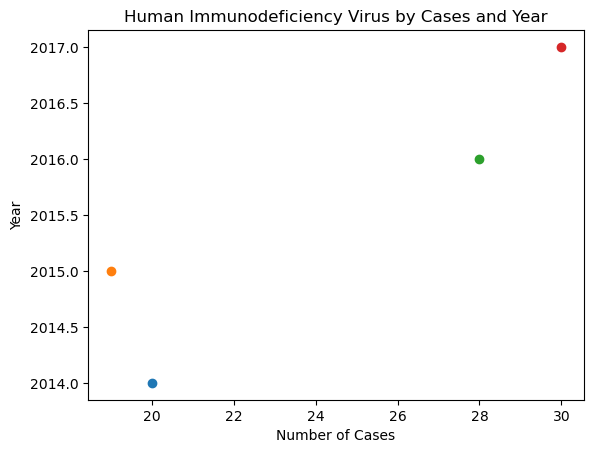

In [105]:
# 8. plot the total number of cases for each year, for the disease indicated in 'diseaseName'
#    Use the matplotlib scatter function (https://matplotlib.org/stable/plot_types/basic/scatter_plot.html)

#I guess I just choose whichever disease I want, as suggested by above description?
diseaseName = 'Human Immunodeficiency Virus'

for year in range(2014,2018):
        cases=0  
        disease_df = dfSexSorted.query("Year == @year and Disease == @diseaseName")
        #print(disease_df)
        
        for index, row in disease_df.iterrows():
            cases += row["Number of Cases"]
        
        print("In the year: %d, Human Immunodeficiency Virus had: %d cases" %(year, cases))
        plt.scatter(cases, year)
        plt.title("Human Immunodeficiency Virus by Cases and Year")
        plt.xlabel("Number of Cases")
        plt.ylabel("Year")

# TODO: your code goes here. Be sure to handle potential errors. 
#       Add appropriate axis labels and title.

### Assessment for section 1

***!This cell is completed only by your marker!***


| #  | Task          |Mark | Out of  |  Comments |
|----|---------------|-----|---------|-----------|
| 1  | Load          |     | /2      |           |
| 2  | Sort          |     | /5      |           |
| 3  | Duplicates    |     | /3      |           |
| 4  | Missing       |     | /5      |           |
| 5  | Out-of-bounds |     | /2      |           |
| 6  | Intra check   |     | /3      |           |
| 7  | Inter check   |     | /3      |           |
| 8  | Plot          |     | /2      |           |
| -  | TOTAL         |     | /25     |           |


## Section 2 - Data imputation, reduction, and basic analysis

The novel coronavirus disease 2019 ([COVID-19](https://www.canada.ca/en/public-health/services/diseases/coronavirus-disease-covid-19.html)) is a contagious disease caused by the severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The first known case was identified in December 2019. The disease quickly spread worldwide, resulting in the COVID-19 pandemic. 

In this Section, we will use some simple data science techniques to 1) identify similarities between countries, 2) identify covariates that relate to 

### Dataset: Our World in Data COVID 

The data for this section come [Our World in Data](https://ourworldindata.org/coronavirus), i.e., from their GitHub [repository](https://github.com/owid/covid-19-data/tree/master/public/data). More specifically, the that team aggregated data from multiple sources such as [Johns Hopkins University](https://github.com/CSSEGISandData/COVID-19), various official national sources, the United Nations, the World Bank, Global Burden of Disease, and others. It is released under the [Creative Commons BY License](https://creativecommons.org/licenses/by/4.0/).

There are 67 features in the dataset, only some of which we will use. For information on these, consult https://github.com/owid/covid-19-data/tree/master/public/data.

### Tasks

Our task is to look for simple patterns in the COVID data. First, we will 'fill in the blanks' in the data through imputation, project the data down into fewer dimensions, perform some simple distribution fitting to the data, compute measures of entropy, and finally look for features that are highly related or informative.

Complete each of the code cells below according to the instructions in the comments.

In [121]:
# 1. Impute mising data
#    - Select only countries with a population >= 30 million
#    - Use the KNNImputer from scikit-learn, with k=3 nearest neighbours, to impute missing
#      numeric data among the selected countries
#    - Your resulting DataFrame should have all text and numeric fields below

# Note: you are encouraged to download this file either from here or from Brightspace directly and to use it locally,
#       as long as your code works for the markers (e.g., do not hardcode local paths in submission).
urlCOVID = 'https://dal.brightspace.com/d2l/le/dropbox/250788/174362/DownloadAttachment?fid=14594172'

text_fields = ['location','date']
numeric_fields = ['new_cases_per_million', 'new_deaths_per_million', 
                  'people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred', 
                  'stringency_index', 'population_density', 'median_age', 
                  'gdp_per_capita','extreme_poverty','cardiovasc_death_rate',
                  'hospital_beds_per_thousand','life_expectancy','human_development_index',
                  'population']

# TODO: your code goes here
df = pd.read_csv(r'C:\Users\jmcki\CSCI 4144 Jupyter\owid-covid-data.csv')
from sklearn.impute import KNNImputer
#print(df.head())


high_pop = df[df["population"] >= 30000000]
#print(high_pop.head())
newdf_forknn = high_pop.filter(['new_cases_per_million', 'new_deaths_per_million', 
                  'people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred', 
                  'stringency_index', 'population_density', 'median_age', 
                  'gdp_per_capita','extreme_poverty','cardiovasc_death_rate',
                  'hospital_beds_per_thousand','life_expectancy','human_development_index',
                  'population'], axis=1).copy()
newdf_forknn = (newdf_forknn-newdf_forknn.mean())/newdf_forknn.std()

print("Before imputation:\n", newdf_forknn)

knn_imputer = KNNImputer(missing_values=np.nan, n_neighbors=3, weights='uniform', metric='nan_euclidean')
#knn_imputer.fit(newdf)
newdf_forknn = pd.DataFrame(knn_imputer.fit_transform(newdf_forknn), columns=newdf_forknn.columns)

print("After imputation:")
print(newdf_forknn)
#newdf_forknn = newdf_forknn.join(text_fields)
#REMEMBER TO DROP/APPEND CATEGORICAL COLUMNS

Before imputation:
         new_cases_per_million  new_deaths_per_million  \
0                   -0.331243                     NaN   
1                   -0.331592                     NaN   
2                   -0.331592                     NaN   
3                   -0.331592                     NaN   
4                   -0.331592                     NaN   
...                       ...                     ...   
242345              -0.331592               -0.478007   
242346              -0.331592               -0.478007   
242347              -0.331592               -0.478007   
242348              -0.331592               -0.478007   
242349              -0.331592               -0.478007   

        people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                                 NaN                                  NaN   
1                                 NaN                                  NaN   
2                                 NaN                        

AttributeError: 'builtin_function_or_method' object has no attribute 'is_unique'

In [89]:
# 2. Extract the top 10 principal components

# TODO: your code goes here

from sklearn.decomposition import PCA


pca = PCA(n_components=10)
principle_components = pca.fit_transform(newdf_forknn)





#print(principle_components.shape)
print(principle_components.shape)
principal_component_df = pd.DataFrame(data = principle_components, columns = ['principal component 1', 'principal component 2', 'principal component 3','principal component 4','principal component 5','principal component 6','principal component 7', 'principal component 8','principal component 9','principal component 10',])
print(principal_component_df.head())

print(pca.explained_variance_)

(64566, 10)
   principal component 1  principal component 2  principal component 3  \
0              -3.528849              -0.505019              -1.627364   
1              -3.528911              -0.504995              -1.627325   
2              -3.528911              -0.504995              -1.627325   
3              -3.528911              -0.504995              -1.627325   
4              -3.528911              -0.504995              -1.627325   

   principal component 4  principal component 5  principal component 6  \
0              -0.623396               0.203123               1.636945   
1              -0.623615               0.203037               1.636884   
2              -0.623615               0.203037               1.636884   
3              -0.623615               0.203037               1.636884   
4              -0.623615               0.203037               1.636884   

   principal component 7  principal component 8  principal component 9  \
0               0.587827

Fitting 10 distributions: 100%|██████████| 10/10 [00:32<00:00,  3.22s/it]


{'expon': {'loc': 30547586.0, 'scale': 482573127.53060436}, 0: {'expon': {'loc': -0.3315919285836291, 'scale': 0.32618250605780164}}}


Fitting 10 distributions: 100%|██████████| 10/10 [00:31<00:00,  3.17s/it]


{'expon': {'loc': 30547586.0, 'scale': 482573127.53060436}, 0: {'expon': {'loc': -0.47800707013672905, 'scale': 0.4627300865188027}}}


Fitting 10 distributions: 100%|██████████| 10/10 [00:31<00:00,  3.15s/it]


{'expon': {'loc': 30547586.0, 'scale': 482573127.53060436}, 0: {'expon': {'loc': -1.5699082567537384, 'scale': 1.155721921249901}}}


Fitting 10 distributions: 100%|██████████| 10/10 [00:31<00:00,  3.13s/it]


{'expon': {'loc': 30547586.0, 'scale': 482573127.53060436}, 0: {'expon': {'loc': -1.4316831550305882, 'scale': 0.9854914802354657}}}


Fitting 10 distributions: 100%|██████████| 10/10 [00:31<00:00,  3.17s/it]


{'expon': {'loc': 30547586.0, 'scale': 482573127.53060436}, 0: {'norm': {'loc': 0.05158055823427932, 'scale': 0.9881418216313862}}}


Fitting 10 distributions: 100%|██████████| 10/10 [00:31<00:00,  3.16s/it]


{'expon': {'loc': 30547586.0, 'scale': 482573127.53060436}, 0: {'expon': {'loc': -0.7304452623262139, 'scale': 0.7213583128084401}}}


Fitting 10 distributions: 100%|██████████| 10/10 [00:31<00:00,  3.15s/it]


{'expon': {'loc': 30547586.0, 'scale': 482573127.53060436}, 0: {'uniform': {'loc': -1.5225655032811807, 'scale': 3.468181182872641}}}


Fitting 10 distributions: 100%|██████████| 10/10 [00:31<00:00,  3.13s/it]


{'expon': {'loc': 30547586.0, 'scale': 482573127.53060436}, 0: {'expon': {'loc': -1.0779521766050248, 'scale': 1.2162228163417133}}}


Fitting 10 distributions: 100%|██████████| 10/10 [00:31<00:00,  3.19s/it]


{'expon': {'loc': 30547586.0, 'scale': 482573127.53060436}, 0: {'cauchy': {'loc': -0.5503480104763057, 'scale': 0.1070363794273019}}}


Fitting 10 distributions: 100%|██████████| 10/10 [00:32<00:00,  3.21s/it]


{'expon': {'loc': 30547586.0, 'scale': 482573127.53060436}, 0: {'gamma': {'a': 1.683633225603666, 'loc': -1.3210827851093236, 'scale': 0.7475665982581269}}}


Fitting 10 distributions: 100%|██████████| 10/10 [00:31<00:00,  3.15s/it]


{'expon': {'loc': 30547586.0, 'scale': 482573127.53060436}, 0: {'expon': {'loc': -0.8685838668886611, 'scale': 0.8062081469929341}}}


Fitting 10 distributions: 100%|██████████| 10/10 [00:31<00:00,  3.16s/it]


{'expon': {'loc': 30547586.0, 'scale': 482573127.53060436}, 0: {'norm': {'loc': 0.05723920111810545, 'scale': 0.9394093451951041}}}


Fitting 10 distributions: 100%|██████████| 10/10 [00:31<00:00,  3.14s/it]


{'expon': {'loc': 30547586.0, 'scale': 482573127.53060436}, 0: {'uniform': {'loc': -1.8566772127724709, 'scale': 3.439471554219218}}}


Fitting 10 distributions: 100%|██████████| 10/10 [00:31<00:00,  3.16s/it]


{'expon': {'loc': 30547586.0, 'scale': 482573127.53060436}, 0: {'cauchy': {'loc': -0.3599580532677791, 'scale': 0.02621965960223733}}}


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,2.251488,1289.586766,-662673.700895,inf,0.296749,0.0
expon,56.575980,1456.468594,-454513.366806,inf,0.492671,0.0
rayleigh,85.501009,1299.652502,-427851.246506,inf,0.414060,0.0
norm,87.795478,1265.732889,-426141.421737,inf,0.352187,0.0
uniform,93.354817,370.399684,-422177.232180,inf,0.778601,0.0


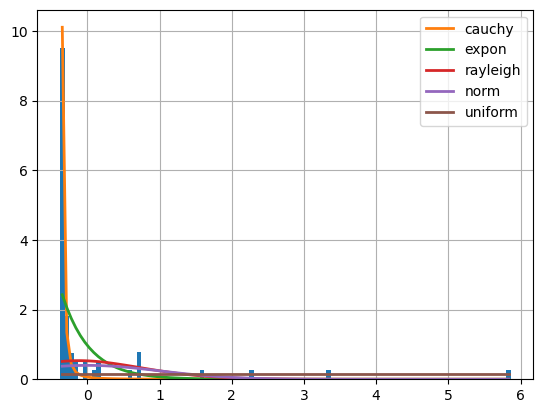

In [90]:
# 3. For each numeric field separately, using the imputed data:
#        a) identify best distributions using the Fitter library 
#           (https://pypi.org/project/fitter/) 
#           Only consider the subset in common_distributions
#        b) print the summary for each fit using the built in fitter summary() function
#        c) plot the data using the Fitter.hist() function
#        d) plot the density function using the Fitter.plot_pdf() function


# TODO: your code goes here
i = 0
for columns in newdf_forknn.select_dtypes(include=['float']).columns:
    data = newdf_forknn[columns].values
    fitter = Fitter(data, distributions= get_common_distributions())
    fitter.fit()
    best[i] = fitter.get_best()
    print(best)
    i+1
fitter.summary()

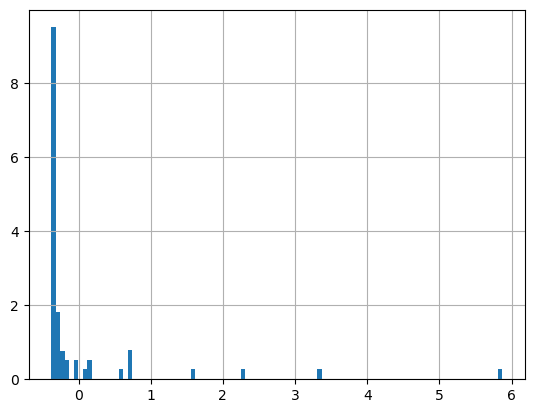

In [91]:
fitter.hist()

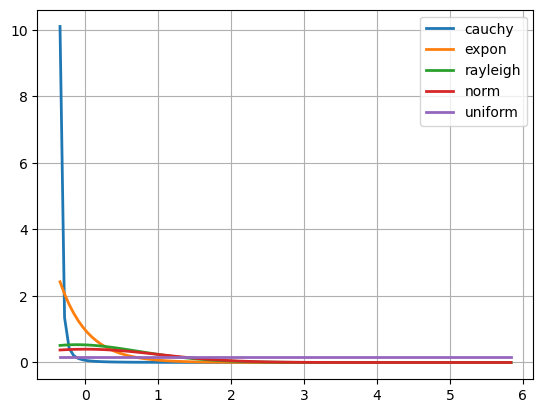

In [92]:
fitter.plot_pdf()

In [86]:
# 4. For each numeric field separately, using the imputed data:
#        a) Using the best distribution from the previous cell, _and all of its parameters_,
#           print the results of the associated entropy() method in scipy.stats
#           e.g., if the best distribution found is chi2, call
#                 scipy.stats.chi2.entropy( mydf, loc=myloc, scale=myscale ) for 
#                 computed values of mydf, myloc, and myscale
#        b) bin the data for that field once into 100 equal-width bins and
#           once into 100 equal-frequency bins. Store the proportional frequency of
#           each bin, relative to the total number of samples, in p_equalWidth and 
#           p_equalFreq, below
#        c) compute and print the Shannon entropy on each of p_equalWidth and p_equalFreq using
#           https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html
#
#    In the Markdown cell below, describe in your own words what differences you observe
#    in the results between the distribution-based and the two Shannon-based entropy methods.
#    Which numeric field is the most informative? Which is the least informative?

# TODO: your code goes here

#    discretize data in two methods - equal probability vs equal size.
#    compute entropy.
p_equalWidth = np.zeros(100)
p_equalFreq  = np.zeros(100)

# TODO: your code goes here
print(best)
myloc = best['expon']['loc']
myscale = best['expon']['scale']
#print(myloc)
#print(myscale)



{'expon': {'loc': 30547586.0, 'scale': 482573127.53060436}, 0: {'expon': {'loc': 30547586.0, 'scale': 482573127.53060436}}}


**TODO**: Enter your discussion for task 4 of Section 2 here, in no more than 10 sentences.

In [ ]:
# 5. Identify variables that relate to important COVID outcomes
#    For each of 'new_cases_per_million' and 'new_deaths_per_million', compute Pearson
#    correlation (using https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)
#    with that field and all other numeric fields
#
#        For the 4 features most correlated with the outcome of interest, plot a 5x5 
#        SeaBorn PairGrid (https://seaborn.pydata.org/generated/seaborn.PairGrid.html) with
#        scatter in the upper matrix, histograms on the diagonal, and kde plots on the 
#        lower matrix, as in:
#
#               g = sns.PairGrid(penguins, diag_sharey=False)
#               g.map_upper(sns.scatterplot)
#               g.map_lower(sns.kdeplot)
#               g.map_diag(sns.histplot)
#
#    In the Markdown cell below, list the features that are most correlated with 
#    'new_cases_per_million' and 'new_deaths_per_million'. Are these the same that 
#    were 'informative' in task 4 of Section 2? Why or why not?
#
# TODO: your code goes here

**TODO**: Enter your discussion for task 5 of Section 2 here, in no more than 5 sentences.


CITATIONS:
    https://fitter.readthedocs.io/en/latest/_modules/fitter/fitter.html
    https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
    https://www.jcchouinard.com/pca-with-python/
    https://www.w3schools.com/python/matplotlib_scatter.asp
    https://stackoverflow.com/questions/42223587/plt-scatter-how-to-add-title-and-xlabel-and-ylabel
    https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/
    https://www.geeksforgeeks.org/python-imputation-using-the-knnimputer/

### Assessment for section 2

***!This cell is completed only by your marker!***


| #  | Task          |Mark | Out of  |  Comments |
|----|---------------|-----|---------|-----------|
| 1  | Impute        |     | /4      |           |
| 2  | PCA           |     | /1      |           |
| 3  | Fit           |     | /4      |           |
| 4  | Entropy       |     | /8      |           |  
| 5  | Correlations  |     | /5      |           |
| -  | TOTAL         |     | /22     |           |

## Bonus [5 Marks]

- We will give up to 5 bonus marks for innovative work going substantially beyond the minimal requirements. 
- These marks can make up for marks lost in other sections of the assignment, but your overall mark for this assignment cannot exceed 100%. 
- You may decide to pursue any number of tasks of your own design related to this assignment, although you should consult with the instructor or the lead TA before embarking on such exploration, and the value of bonus work is left to the discretion of the markers. 
- Be sure to document your work sufficiently for the markers to understand what you're doing. You can add additional Code or MarkDown cells below, as necessary.
- Certainly, the rest of the assignment takes higher priority. 

Some ideas:

1. **Outlier corruptions**. Introduce some outliers to the data in Section 1, and write a program that can identify and potentially remove those outliers. Experiment with different methods of ourlier detection, compare them, and report your results.
2. **Spelling correction**. Correct the spelling errors in Section 1, or at least identify which text fields have errors in them. 
3. **Imputation**. Perform imputation for the missing Nova Scotia data in Section 1.
4. **Better correlations**. Are there better ways of assessing correlation between variables across time series, in Section 2?
5. **Differential entropy**. Consider reading scientific articles on differential entropy, using the method from scipy.stats.differential_entropy, and comparing against the results you obtained in Section 2. How do you expect the results to differ? How are the results different?
6. **Analysis of principal components**. Repeat some of the analysis you did with the original features (e.g., entropy) but with the principal components you extracted. What do you observe across the principal components? How are the results different than with the original features?
7. **General improvements**. Are there any approaches prescribed in this assignment that would have been more appropriate or meaningful?


In [ ]:
# BONUS Section

# TODO YOUR CODE GOES HERE

**TODO**: Any discussion for the Bonus section goes here. Feel free to add additional cells below this one, and before the assessment cell. 

### Assessment for bonus section

***!This cell is completed only by your marker!***


| #  | Task          |Mark | Out of  |  Comments |
|----|---------------|-----|---------|-----------|
| 1  | Bonus         |     | /5      |           |


## Academic Integrity

The following is template information. If there is any ambiguity or contradiction with official Dalhousie University policies, those Dalhousie University policies take effect.

At Dalhousie University, we respect the values of academic integrity: honesty, trust, fairness, responsibility, and respect. As a student, adherence to the values of academic integrity and related policies is a requirement of being part of the academic community at Dalhousie University.

### What does academic integrity mean?

Academic integrity means being honest in the fulfillment of your academic responsibilities thus establishing mutual trust. Fairness is essential to the interactions of the academic community and is achieved through respect for the opinions and ideas of others. Violations of intellectual honesty are oﬀensive to the entire academic community, not just to the individual faculty member and students in whose class an oﬀence occur (See the Dalhousie Secretariat's page on [Academic Integrity](https://www.dal.ca/dept/university_secretariat/academic-integrity.html).

### How can you achieve academic integrity?

- Make sure you understand Dalhousie’s policies on academic integrity.
- Give appropriate credit to the sources used in your assignment such as written or oral work, computer codes/programs, artistic or architectural works, scientific projects,  performances,  web page designs, graphical representations, diagrams, videos, and images. Use [RefWorks](http://www.library.dal.ca/How/RefWorks) to keep track of your research and edit and format bibliographies in the citation style required by the instructor.
- Do not download the work of another from the Internet and submit it as your own.
- Do not submit work that has been completed through collaboration or previously submitted for another assignment without permission from your instructor.
- Do not write an examination or test for someone else.
- Do not falsify data or lab results.

These examples should be considered only as a guide and not an exhaustive list.

### What will happen if an allegation of an academic oﬀence is made against you?

The teaching team is required to report any suspected oﬀence. The full process is outlined in the Discipline flow chart, which can be found [here](https://cdn.dal.ca/content/dam/dalhousie/pdf/dept/university_secretariat/FDPflowchartSEpt2016.pdf) and includes the following:

1. Each Faculty has an Academic Integrity Oﬃcer (AIO) who receives allegations from instructors.
2. The AIO decides whether to proceed with the allegation and you will be notified of the process.
3. If the case proceeds, you will receive an INC (incomplete) grade until the matter is resolved.
4. If you are found guilty of an academic oﬀence, a penalty will be assigned ranging from a warning to a suspension or expulsion from the University and can include a notation on your transcript, failure of the assignment or failure of the course. All penalties are academic in nature.

### Where can you turn for help?

- If you are ever unsure about ANYTHING, contact the teaching team or lead instructor.
- The Academic Integrity website (http://academicintegrity.dal.ca) has links to policies, definitions, online tutorials, tips on citing and paraphrasing.
- The Writing Center provides assistance with proofreading, writing styles, citations.
- Dalhousie Libraries have workshops, online tutorials, citation guides, Assignment Calculator, RefWorks, etc.
- The Dalhousie Student Advocacy Service assists students with academic appeals and student discipline procedures.
- The Senate Oﬃce provides links to a list of Academic Integrity Oﬃcers, discipline flow chart, and Senate Discipline Committee.


## Academic offenses

There is a zero-tolerance policy on academic offenses such as plagiarism or inappropriate collaboration. By submitting your solution for this assignment, you acknowledge that the code submitted is your own work. You also agree that your code may be submitted to plagiarism detection software (such as MOSS) unless you have notified the teaching team otherwise, in writing, before the submission deadline. Any suspected act of plagiarism will be reported to the Faculty’s Academic Integrity Officer in accordance with Dalhousie University’s regulations regarding Academic Integrity. Please note that:

1. The assignments are individual assignments. You can discuss the problems with your friends/classmates, but you need to write your program by yourself. There should not be much similarity in terms of coding. 
2. When you refer to some online resources to complete your program, you need to understand the mechanism, then write your own code. Your code should not be similar to the online resources. In addition, you should cite the sources via comments in your program.

